                     Count
Datetime                  
2012-08-25 00:00:00    8.0
2012-08-25 01:00:00    2.0
2012-08-25 02:00:00    6.0
2012-08-25 03:00:00    2.0
2012-08-25 04:00:00    2.0


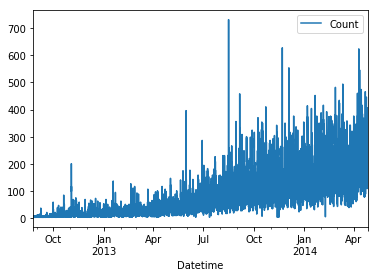

In [185]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from dateutil import parser as ps

%matplotlib inline


   
def parser(x):
    dt = datetime.strptime(x, '%d-%m-%Y %H:%M')
    return dt
 
series = read_csv('train.csv', header=0, parse_dates=[1], index_col=1, squeeze=True,date_parser=parser)
series=series.iloc[:,1:]
series.iloc[:,0]=series.iloc[:,0]/10*10
series_test=series.iloc[int(len(series)*0.8):,:]
series=series.iloc[:int(len(series)*0.8),:]
print(series.head())
series.plot()
pyplot.show()

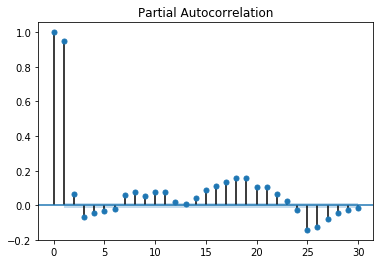

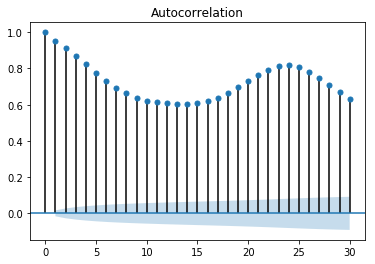

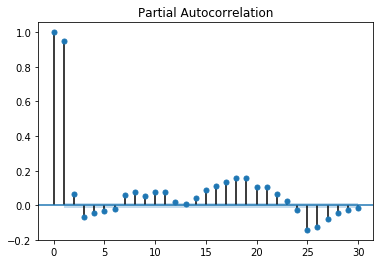

In [201]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(series,lags=30)
plot_pacf(series,lags=30)

                             ARIMA Model Results                              
Dep. Variable:                D.Count   No. Observations:                14629
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -69425.803
Method:                       css-mle   S.D. of innovations             27.850
Date:                Sun, 21 Jan 2018   AIC                         138857.606
Time:                        01:57:03   BIC                         138880.379
Sample:                    08-25-2012   HQIC                        138865.171
                         - 04-26-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0137      0.211      0.065      0.948      -0.400       0.428
ar.L1.D.Count    -0.0905      0.008    -10.990      0.000      -0.107      -0.074
                                    Root

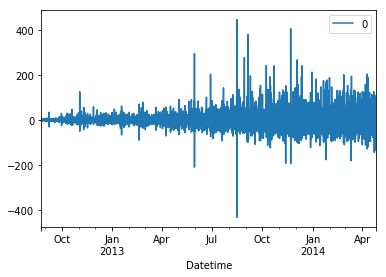

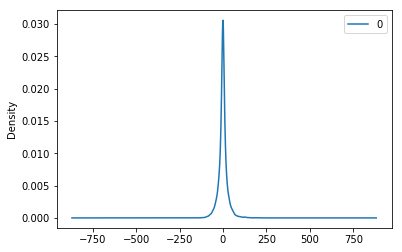

                  0
count  14629.000000
mean      -0.000049
std       27.850777
min     -431.888934
25%      -10.014945
50%       -0.195930
75%        8.718159
max      444.699834


In [193]:
model = ARIMA(series, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [194]:
predicted_y=model_fit.forecast(steps=int(len(series_test)))
A={'predicted':predicted_y[0],'actual':series_test.iloc[:,0]}
B=pd.DataFrame(A)

In [195]:
np.mean(abs(B.predicted-B.actual)/B.actual)

0.3984780095349185